In [21]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dataworkshop-project/Road signs recognition'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dataworkshop-project/Road signs recognition


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [5]:
len(np.unique(y_train))

43

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [8]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 6.1250 - accuracy: 0.7951


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax')
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [12]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 39.2907 - accuracy: 0.7346 - val_loss: 0.2426 - val_accuracy: 0.9395
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2057 - accuracy: 0.9520 - val_loss: 0.0956 - val_accuracy: 0.9777
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1225 - accuracy: 0.9695 - val_loss: 0.0797 - val_accuracy: 0.9819
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1108 - accuracy: 0.9750 - val_loss: 0.1398 - val_accuracy: 0.9656
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0834 - accuracy: 0.9807 - val_loss: 0.0596 - val_accuracy: 0.9849


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)
  
  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)
  
  return accuracy_score(y_test_norm, y_pred)

In [24]:
predict(model_trained, X_test, y_test)

0.8428571428571429

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [28]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 4.8031 - accuracy: 0.2115 - val_loss: 1.8491 - val_accuracy: 0.5058
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 1.3582 - accuracy: 0.6086 - val_loss: 0.4644 - val_accuracy: 0.8936
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.7022 - accuracy: 0.7937 - val_loss: 0.2137 - val_accuracy: 0.9522
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.4129 - accuracy: 0.8757 - val_loss: 0.1135 - val_accuracy: 0.9778
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2942 - accuracy: 0.9115 - val_loss: 0.0553 - val_accuracy: 0.9886


0.9360544217687075

In [29]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 8s 29ms/step - loss: 2.1764 - accuracy: 0.5233 - val_loss: 0.3194 - val_accuracy: 0.9241
Epoch 2/5
272/272 [==============================] - 8s 28ms/step - loss: 0.4715 - accuracy: 0.8647 - val_loss: 0.0912 - val_accuracy: 0.9779
Epoch 3/5
272/272 [==============================] - 8s 28ms/step - loss: 0.2291 - accuracy: 0.9340 - val_loss: 0.0538 - val_accuracy: 0.9889
Epoch 4/5
272/272 [==============================] - 8s 28ms/step - loss: 0.1596 - accuracy: 0.9542 - val_loss: 0.0276 - val_accuracy: 0.9934
Epoch 5/5
272/272 [==============================] - 8s 28ms/step - loss: 0.1048 - accuracy: 0.9688 - val_loss: 0.0120 - val_accuracy: 0.9974


0.9732426303854875

In [33]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 9s 33ms/step - loss: 2.9609 - accuracy: 0.2252 - val_loss: 1.3852 - val_accuracy: 0.5778
Epoch 2/5
272/272 [==============================] - 8s 31ms/step - loss: 1.1403 - accuracy: 0.6475 - val_loss: 0.2971 - val_accuracy: 0.9154
Epoch 3/5
272/272 [==============================] - 8s 31ms/step - loss: 0.5303 - accuracy: 0.8385 - val_loss: 0.1250 - val_accuracy: 0.9663
Epoch 4/5
272/272 [==============================] - 9s 31ms/step - loss: 0.3151 - accuracy: 0.9038 - val_loss: 0.0647 - val_accuracy: 0.9806
Epoch 5/5
272/272 [==============================] - 9s 32ms/step - loss: 0.2453 - accuracy: 0.9270 - val_loss: 0.0499 - val_accuracy: 0.9878


0.9625850340136054

In [34]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 9s 34ms/step - loss: 2.4530 - accuracy: 0.3086 - val_loss: 1.3758 - val_accuracy: 0.5448
Epoch 2/5
272/272 [==============================] - 9s 32ms/step - loss: 1.0043 - accuracy: 0.6709 - val_loss: 0.2633 - val_accuracy: 0.9242
Epoch 3/5
272/272 [==============================] - 9s 32ms/step - loss: 0.4107 - accuracy: 0.8699 - val_loss: 0.0967 - val_accuracy: 0.9725
Epoch 4/5
272/272 [==============================] - 9s 33ms/step - loss: 0.2466 - accuracy: 0.9258 - val_loss: 0.0493 - val_accuracy: 0.9859
Epoch 5/5
272/272 [==============================] - 9s 32ms/step - loss: 0.1815 - accuracy: 0.9464 - val_loss: 0.0321 - val_accuracy: 0.9908


0.9605442176870749

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [42]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 9s 33ms/step - loss: 2.8206 - accuracy: 0.2200 - val_loss: 0.8337 - val_accuracy: 0.7371
Epoch 2/5
272/272 [==============================] - 9s 32ms/step - loss: 0.6126 - accuracy: 0.8017 - val_loss: 0.1775 - val_accuracy: 0.9511
Epoch 3/5
272/272 [==============================] - 9s 32ms/step - loss: 0.2774 - accuracy: 0.9118 - val_loss: 0.0863 - val_accuracy: 0.9733
Epoch 4/5
272/272 [==============================] - 9s 32ms/step - loss: 0.1827 - accuracy: 0.9434 - val_loss: 0.0520 - val_accuracy: 0.9857
Epoch 5/5
272/272 [==============================] - 9s 32ms/step - loss: 0.1357 - accuracy: 0.9585 - val_loss: 0.0276 - val_accuracy: 0.9925


0.9575963718820861

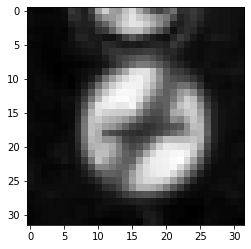

In [43]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))